[internships.datalabs.info](https://internships.datalabs.info)


### Internship on "Data Science" at InfraBIM Techno Solutions
#### DS-10: Project - 

Internship Reg. No.:2200<br>
Name:B.Meher Vaishnavi<br>
Date:12-04-2023

### Problem Statement

Heavy rainfall is a cause for natural disasters like floods and drought that square measure encountered by individuals across the world each year. Many models are developed to evaluate the rainfall and for predicting the likeliness of rain. This model can predict the rainfall with utmost accuracy by using the classifications

## <div id="toc">Table of Contents</div>
<ol>
<li><a href="#ImportLibraries" style="text-decoration:none">Import Packages</a></li>
<li><a href="#LoadDataset" style="text-decoration:none">Load Dataset</a></li>
<li><a href="#EDA" style="text-decoration:none">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#ModelSelection" style="text-decoration:none">Model Selection and Evaluation</a></li>
<li><a href="#CreatePickle" style="text-decoration:none">Create Pickle file</a></li>
</ol>

In [158]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [159]:
url = "https://live-projects-data.s3.ap-south-1.amazonaws.com/liver.csv"
df = pd.read_csv(url)
print(df)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [160]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [161]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<AxesSubplot:>

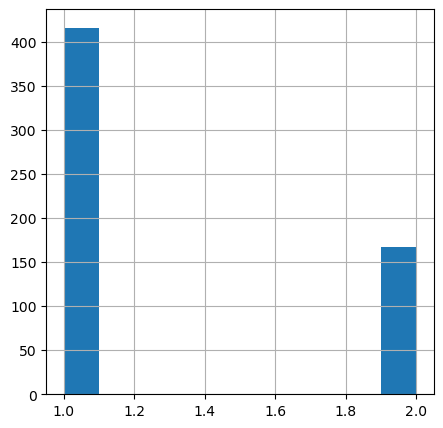

In [162]:
df['Dataset'].hist(figsize=(5,5))

In [163]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']


0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int32

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Gender,583.0,0.756432,0.429603,0.0,1.0,1.00,1.0,1.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [165]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [166]:
# Drop variable which does not have significance in Machine Learning
df = df.drop(['Unnamed: 32','id'],axis = 1, errors='ignore')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [167]:
# Check for Null Values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [168]:
df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int32  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB


In [170]:
df['Gender'] = df['Gender'].astype('int64')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


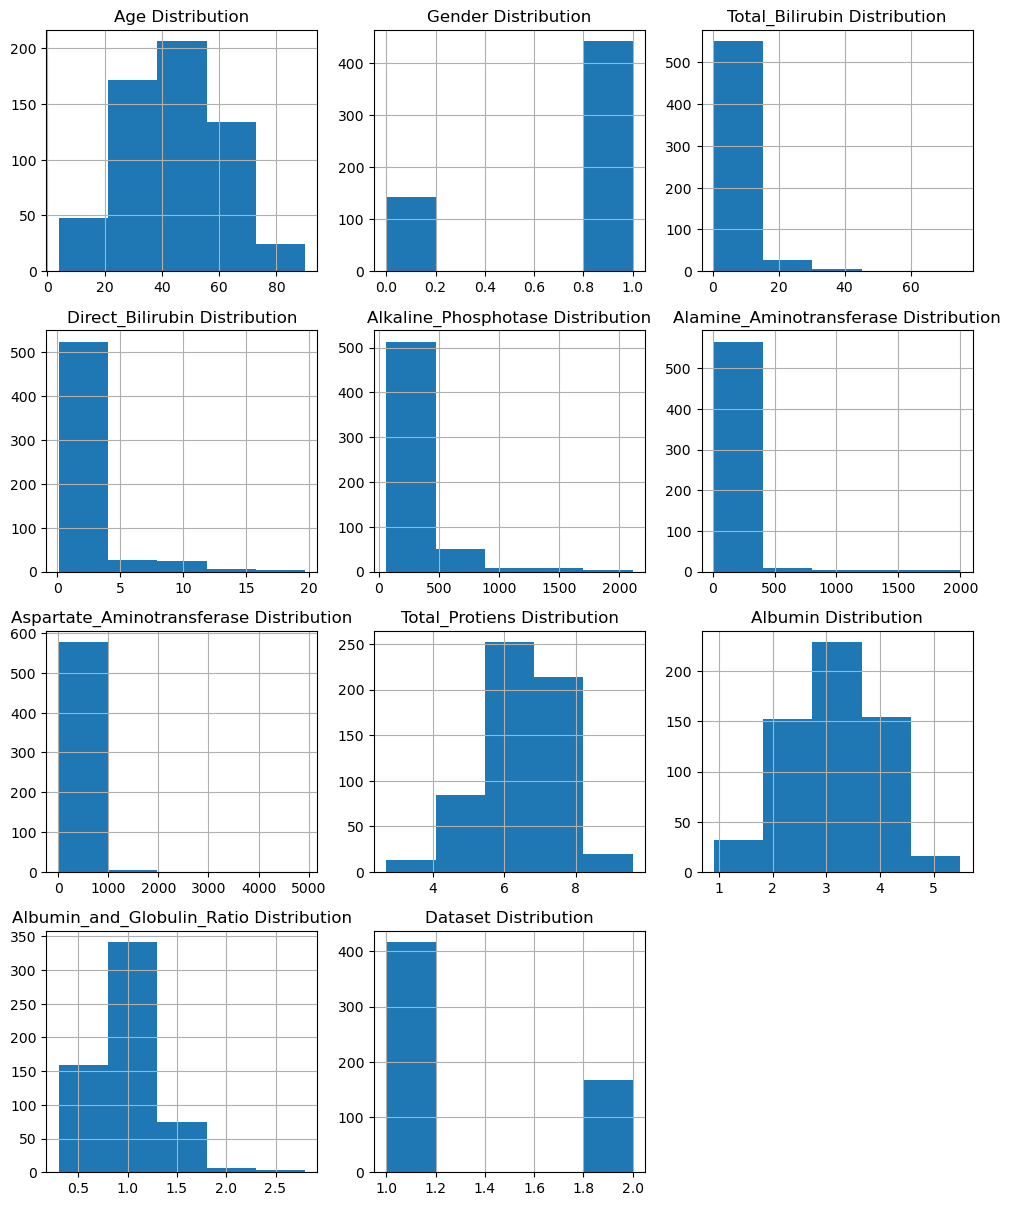

In [172]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,75))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=5,ax=ax)
        ax.set_title(feature+" Distribution",color='black')

    fig.tight_layout()  
    plt.show()

histograms_plot(df,df.columns,25,3)

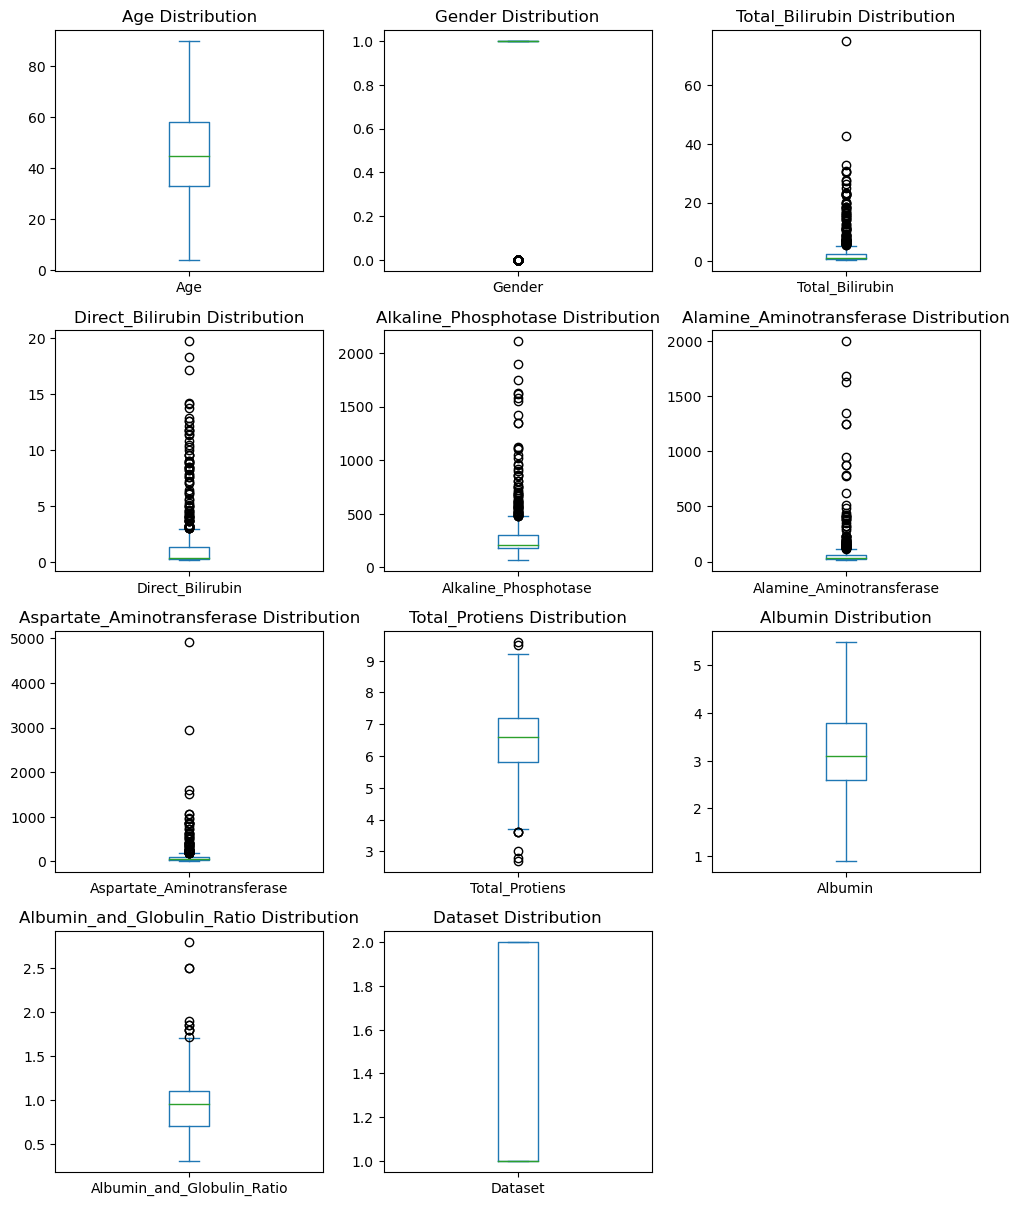

In [173]:
def box_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,75))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].plot(kind='box', title='compactness_mean',ax=ax)
        ax.set_title(feature+" Distribution",color='black')

    fig.tight_layout()  
    plt.show()

box_plot(df,df.columns,25,3)

In [174]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outerliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

pd.DataFrame({'feature':df_outerliers.index, 'count':df_outerliers.values}).sort_values(['count'], ascending=False)

,feature,count
1,Gender,142
2,Total_Bilirubin,84
3,Direct_Bilirubin,81
5,Alamine_Aminotransferase,73
4,Alkaline_Phosphotase,69
6,Aspartate_Aminotransferase,66
9,Albumin_and_Globulin_Ratio,10
7,Total_Protiens,8
0,Age,0
8,Albumin,0


In [175]:
def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.25,0.75]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

In [176]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outerliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

pd.DataFrame({'feature':df_outerliers.index, 'count':df_outerliers.values}).sort_values(['count'], ascending=False)

,feature,count
0,Age,0
1,Gender,0
2,Total_Bilirubin,0
3,Direct_Bilirubin,0
4,Alkaline_Phosphotase,0
5,Alamine_Aminotransferase,0
6,Aspartate_Aminotransferase,0
7,Total_Protiens,0
8,Albumin,0
9,Albumin_and_Globulin_Ratio,0


<AxesSubplot:>

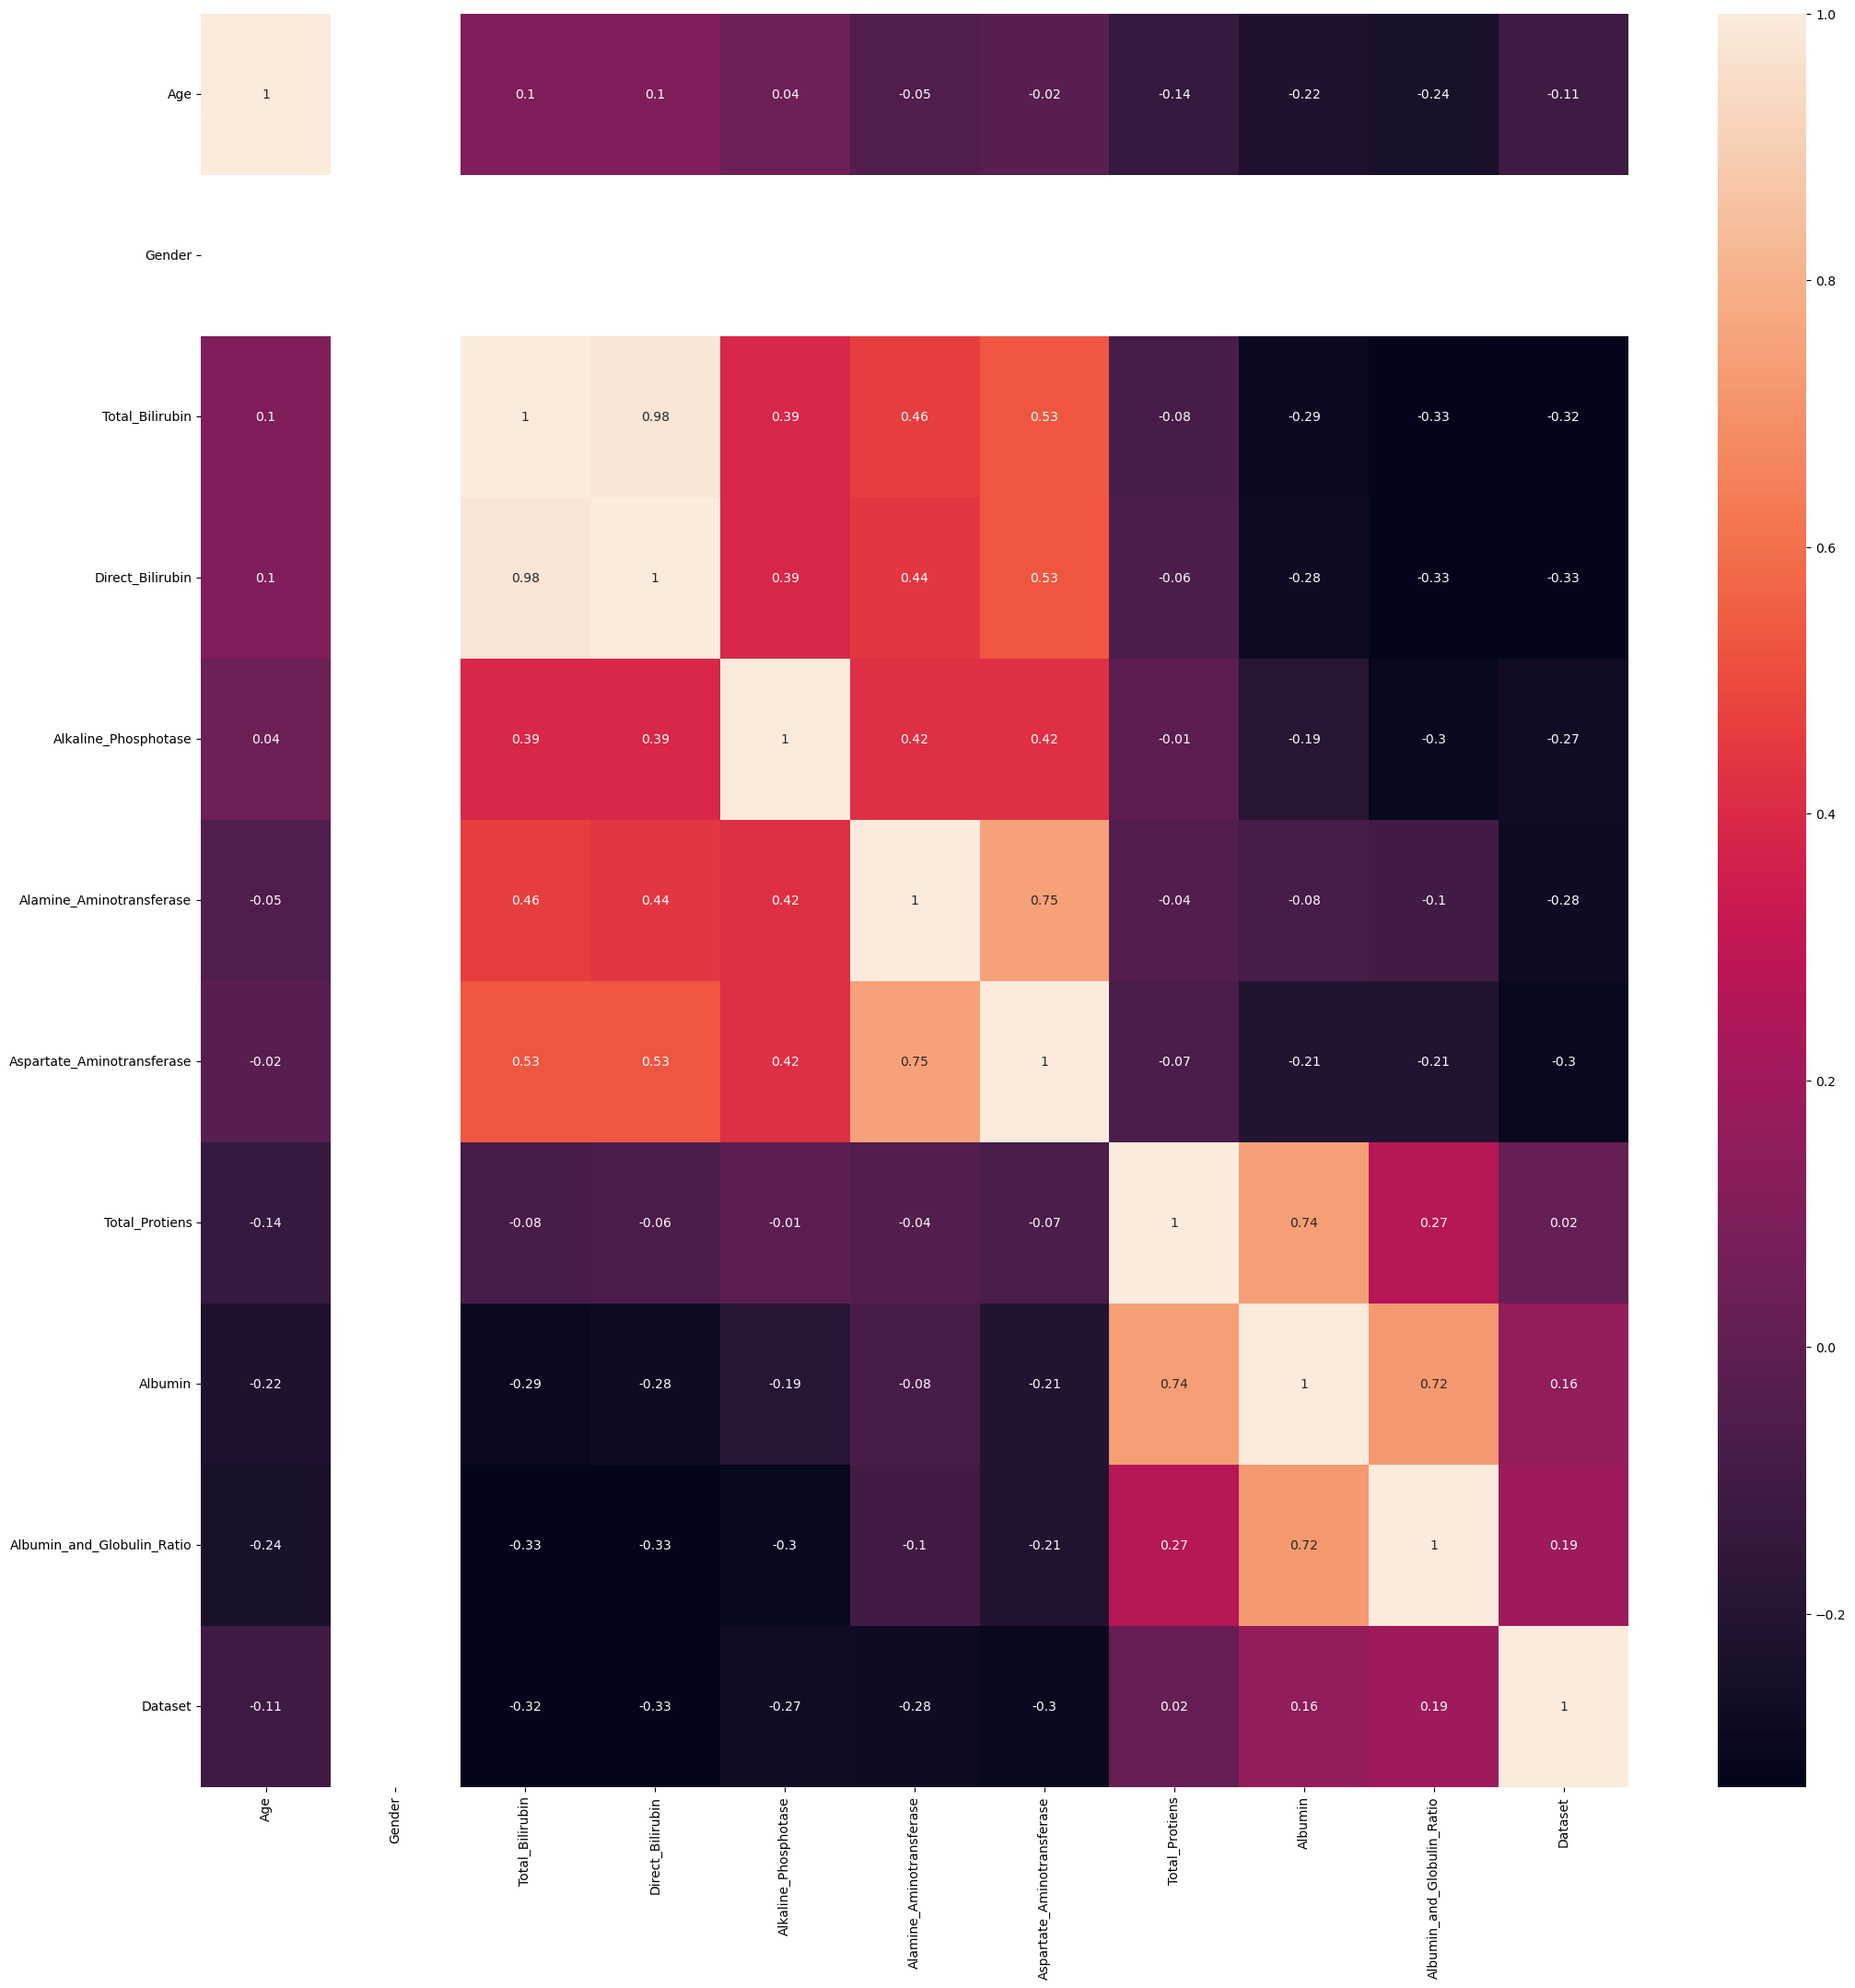

In [177]:
import seaborn as sns

plt.figure(figsize =(25,25))
sns.heatmap(df.corr(method='pearson',min_periods=1).round(2), annot = True)

In [178]:
pd.DataFrame(df.corr(method='pearson',min_periods=1).round(2)["Dataset"].sort_values(ascending = False)[1:])

,Dataset
Albumin_and_Globulin_Ratio,0.19
Albumin,0.16
Total_Protiens,0.02
Age,-0.11
Alkaline_Phosphotase,-0.27
Alamine_Aminotransferase,-0.28
Aspartate_Aminotransferase,-0.30
Total_Bilirubin,-0.32
Direct_Bilirubin,-0.33
Gender,NaN


In [179]:
df.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'], axis=1, inplace=True);

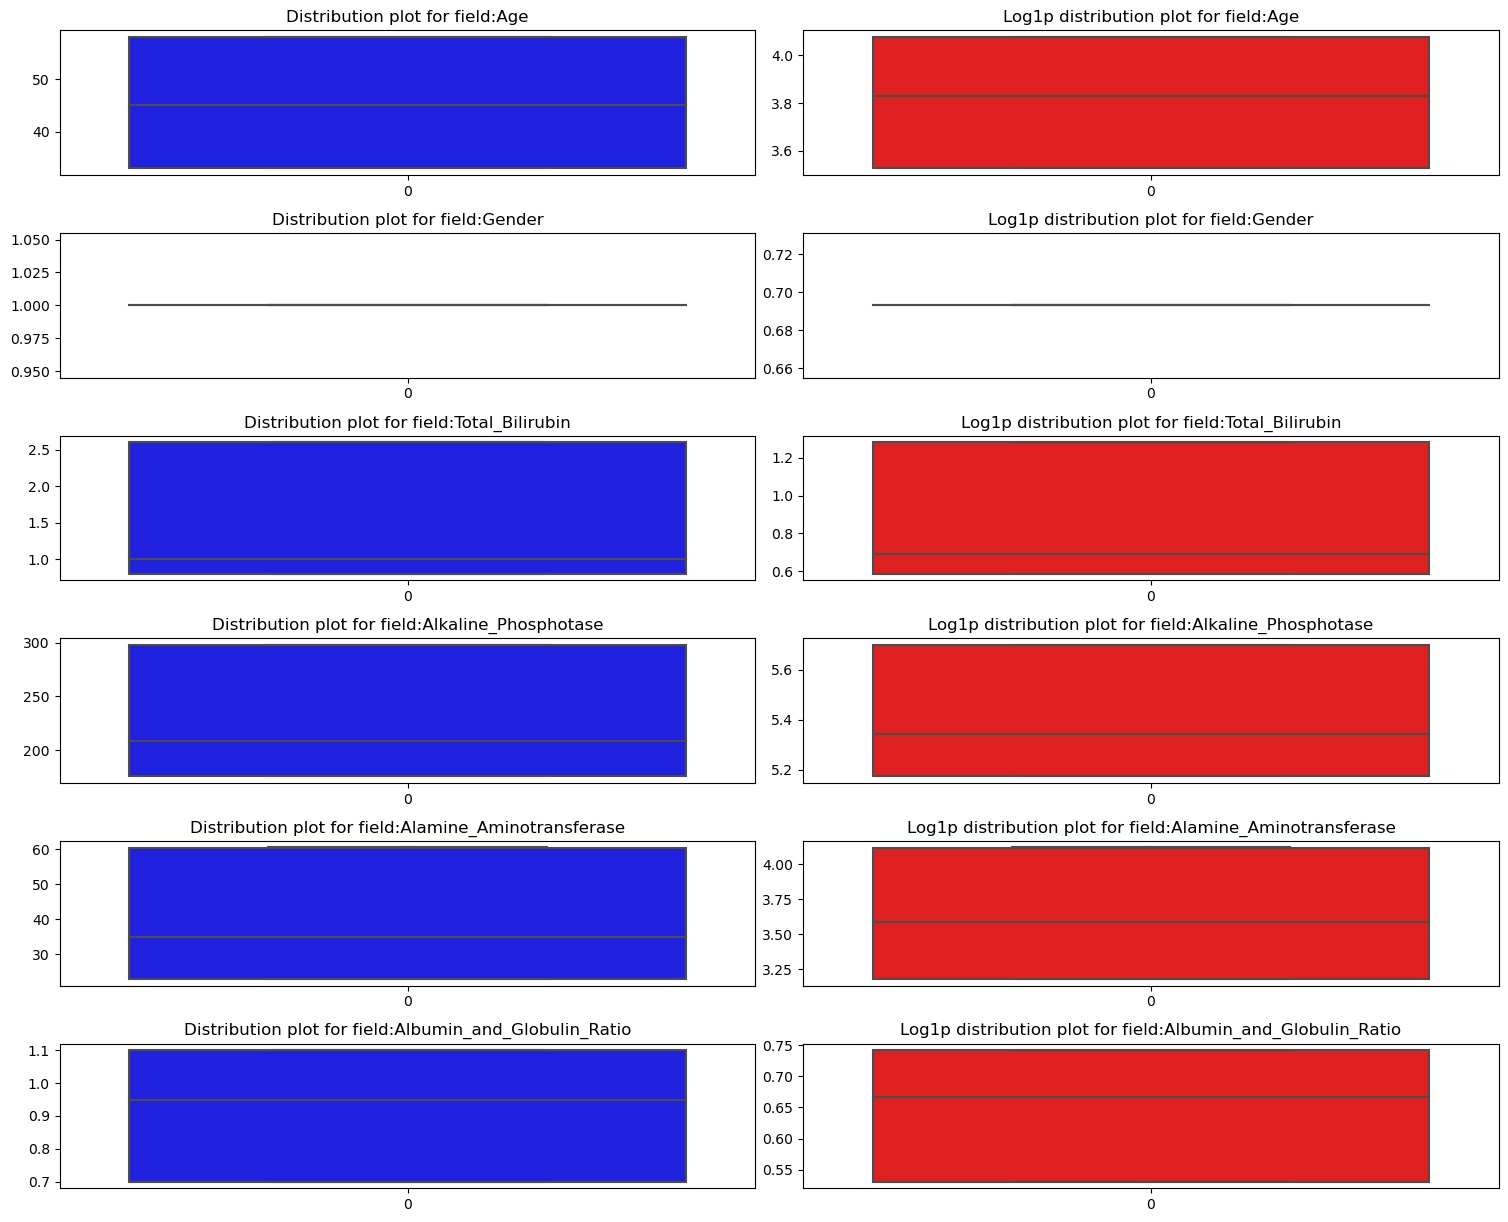

In [180]:
#checking skewness of the variables using two different types of plotting models
plt.figure(figsize=(15, 20))

for i, c in enumerate(df.drop('Dataset', axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
    plt.subplot(10,2,i*2+2)
    sns.boxplot(df[c].apply('log1p'), color='red')
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')

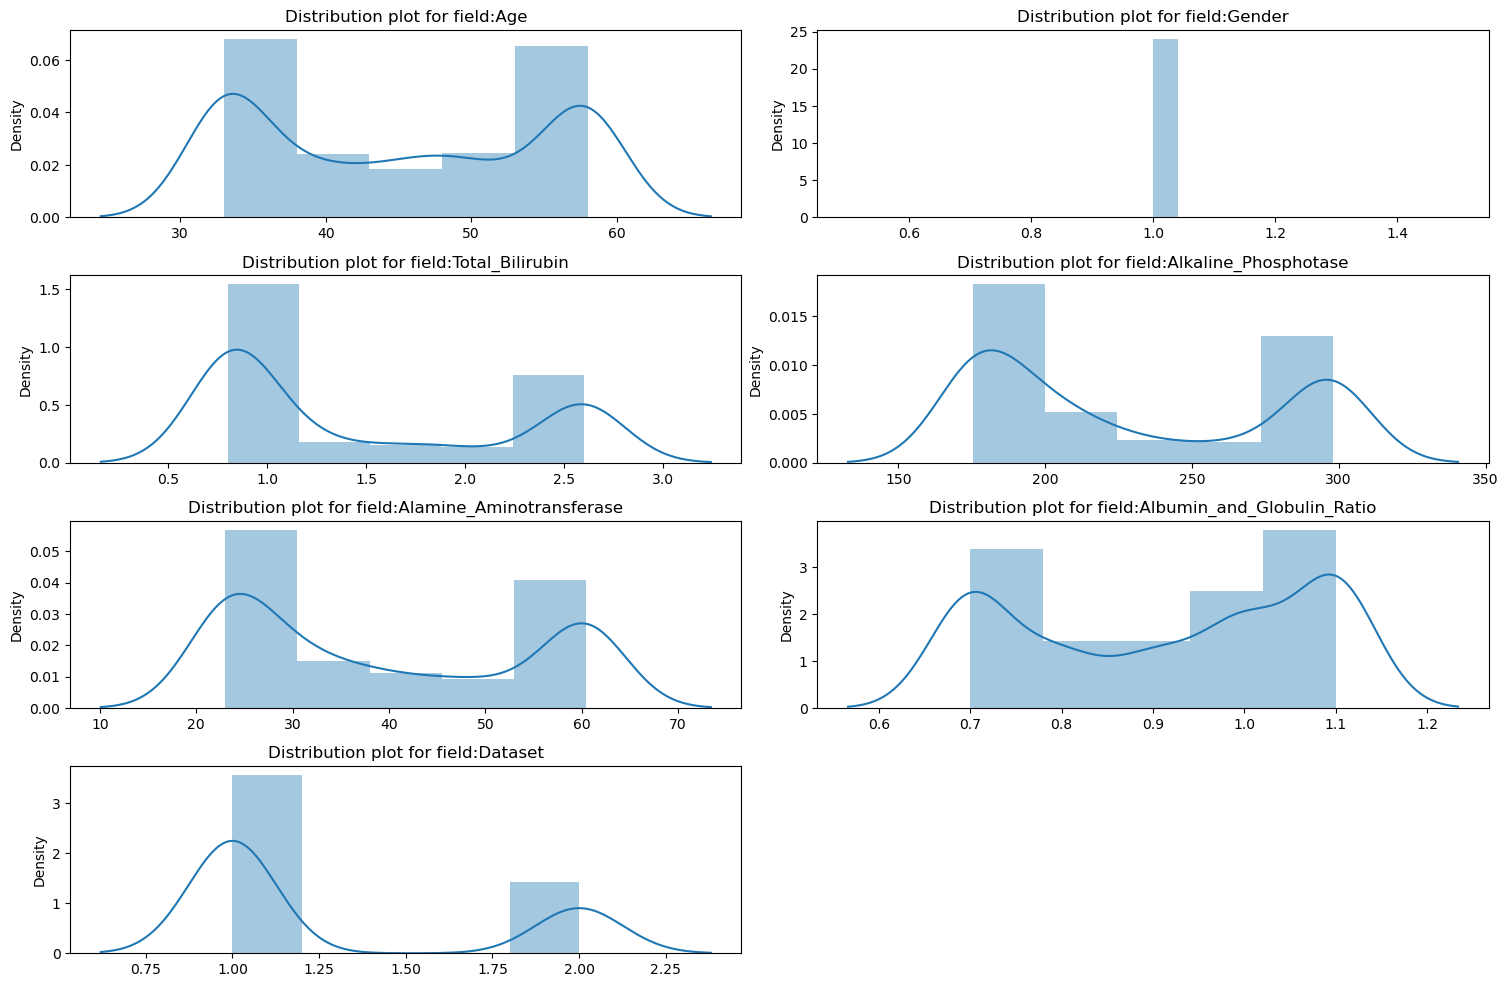

In [181]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [182]:
skewed_cols = ['Albumin_and_Globulin_Ratio','Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']

In [183]:
#A log transformation is a common technique for handling skewed data. By taking the logarithm of the data, the distribution can become more symmetric and easier to work with in statistical analyses.
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

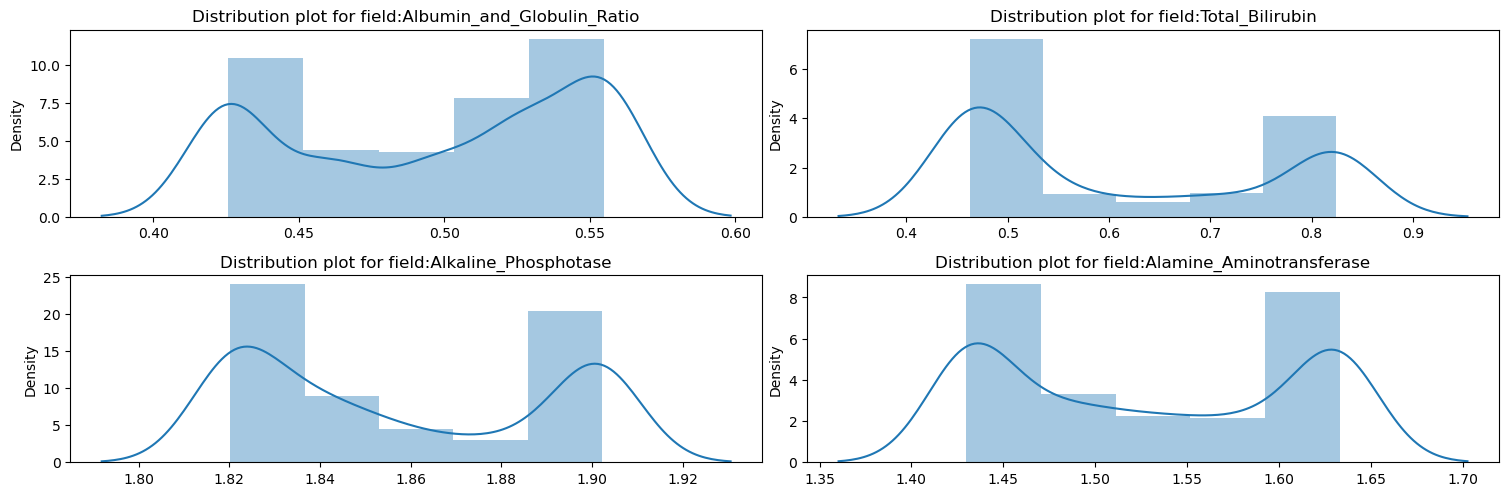

In [184]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [185]:
df.shape

(583, 7)

In [201]:
corr = df.corr()['Dataset']
corr_vars = corr[abs(corr) >= 0.1]
corr_vars = corr_vars.drop('Dataset') # exclude the target variable
print(corr_vars)

Age                          -0.106455
Total_Bilirubin              -0.373765
Alkaline_Phosphotase         -0.326478
Alamine_Aminotransferase     -0.329110
Albumin_and_Globulin_Ratio    0.254647
Name: Dataset, dtype: float64


In [186]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
rs = RobustScaler()
for c in df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio']].columns:
    df[c] = rs.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,0.52,0.0,-0.152003,-0.201428,-0.432772,-0.115796,1
1,0.52,0.0,0.847997,0.681194,0.571584,-0.532099,1
2,0.52,0.0,0.847997,0.681194,0.562871,-0.140769,1
3,0.52,0.0,0.000000,-0.252703,-0.432772,0.126945,1
4,0.52,0.0,0.847997,-0.122158,-0.268240,-0.642160,1


In [187]:
from sklearn.utils import resample
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [188]:
#to check majority and minority 1's and 2's in the dataset
minority = df[df.Dataset==2]
majority = df[df.Dataset==1]
print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 7)
Majority size: (416, 7)


In [189]:
#balancing minority with majority by replacing values
minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 7)


In [190]:
df = pd.concat([minority_upsample, majority], axis=0)

In [191]:
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Dataset', axis=1), df['Dataset'], test_size=0.25, random_state=123)

print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (624, 6)
Test values shape: (208, 6)
Train target shape: (624,)
Test target shape: (208,)


In [193]:
from sklearn.ensemble import ExtraTreesClassifier

In [194]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [195]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=123)
etc.fit(X_train, y_train)
y_train_hat = etc.predict(X_train)
y_test_hat  = etc.predict(X_test)

In [196]:
print(etc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('----------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

ExtraTreesClassifier(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       313
           2       0.99      0.98      0.99       311

    accuracy                           0.99       624
   macro avg       0.99      0.99      0.99       624
weighted avg       0.99      0.99      0.99       624

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.89      0.79      0.84       103
           2       0.81      0.90      0.86       105

    accuracy                           0.85       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.85      0.85      0.85       208

Roc_auc score
----------------------------------------
0.8455848358760979

Confusion matrix
-------------------------------------------------------
[[81 22]
 [1

In [197]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 
               'KNeighborsClassifier',  'RandomForestClassifier', 
               'GaussianNB', 'SVC','ExtraTressClassifier']


#Model Preparation
num_trees = 200
max_features = 3
models = []
models.append(('LR',LogisticRegression(multi_class='ovr')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(probability=True)))
models.append(('etc', ExtraTreesClassifier(random_state=123)))

In [198]:
Score = pd.DataFrame({"Classifier":classifiers})

#Fit model
from sklearn.model_selection import KFold
results = []
names = []
scoring = 'accuracy'
model_score = []

for name,model in models:
    kfold = KFold(n_splits=5,shuffle=False)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_score.append(cv_results.mean()*100)
    
Score["Accuracy"] = model_score
Score.sort_values(by="Accuracy", ascending=False, inplace = True) 
Score

,Classifier,Accuracy
6,ExtraTressClassifier,83.336774
3,RandomForestClassifier,82.856774
1,DecisionTreeClassifier,80.775484
5,SVC,72.918710
2,KNeighborsClassifier,71.634839
0,LogisticRegression,70.833548
4,GaussianNB,70.518710


In [199]:
etc.predict([[45,0,0.6,196,29,1]])

array([1], dtype=int64)

In [200]:
import pickle
pickle.dump(etc,open("Liver.pkl","wb"))
model=pickle.load(open("Liver.pkl","rb"))
model

ExtraTreesClassifier(random_state=123)